In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Example 1

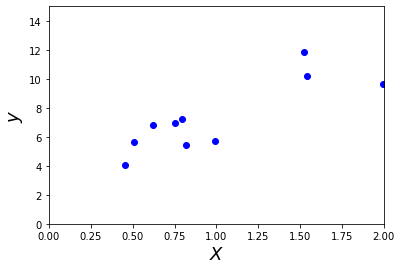

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# prepare data
np.random.seed(50)
X = 2 * np.random.rand(10)
y = 4 + 3 * X + np.random.randn(10)

plt.plot(X,y, "bo")
plt.xlabel("$X$", fontsize = 18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([0,2,0,15])
plt.show();

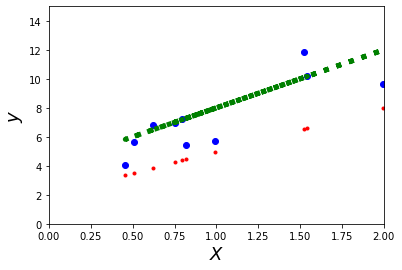

In [3]:
# draw y=3x+2 and y=4x+4 lines

plt.plot(X,y, "bo")
plt.plot(X, 3*X+2, "r.", lw="5", label="y=3x+2")
plt.plot(X, 4*X+4, "g:", lw="5", label="y=4x+4")
plt.xlabel("$X$", fontsize = 18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([0,2,0,15])
plt.show();

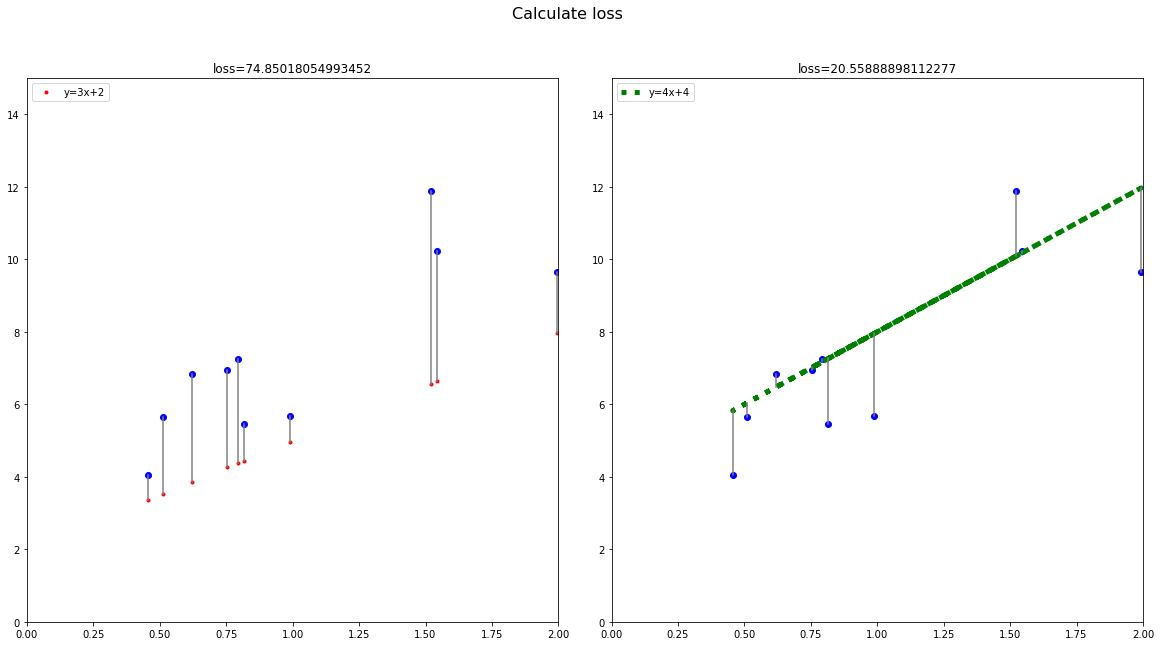

In [4]:
# compare loss, and compare y=3x+2 and y=4x+4 lines

fig,ax_list = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
ax_list[0].plot(X,y,"bo");
ax_list[0].plot(X, 3*X+2, "r.", lw="5", label="y=3x+2");
loss = 0

for i in range(10):
    ax_list[0].plot([X[i],X[i]],[y[i],3*X[i]+2], color='grey')
    loss = loss + np.square(3*X[i]+2-y[i])
    pass
ax_list[0].axis([0, 2, 0, 15]);
ax_list[0].legend(loc="upper left");
ax_list[0].title.set_text('loss=%s'%loss);


ax_list[1].plot(X, y, "bo");
ax_list[1].plot(X, 4*X+4, "g:", lw="5", label = "y=4x+4");
loss = 0
for i in range(10):
    ax_list[1].plot([X[i],X[i]], [y[i],4*X[i]+4], color='grey')
    loss= loss + np.square(4*X[i]+4-y[i])
    pass
ax_list[1].axis([0, 2, 0, 15]);
ax_list[1].legend(loc="upper left");
ax_list[1].title.set_text('loss=%s'%loss);
fig.subplots_adjust(wspace=0.1,hspace=0.5);
fig.suptitle("Calculate loss",fontsize=16);

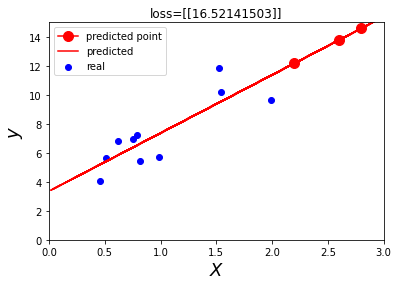

In [5]:
# train model and predict

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape(-1,1), y.reshape(-1,1))

X_test=[[2.2],[2.6],[2.8]]
y_test = lr.predict(X_test)
X_pred = 3*np.random.rand(100,1)
y_pred = lr.predict(X_pred)

plt.scatter(X,y,c='b',label='real')
plt.plot(X_test,y_test,'r',label='predicted point', marker='.', ms=20)
plt.plot(X_pred,y_pred, 'r-',label='predicted')
plt.xlabel("$X$", fontsize = 18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([0,3,0,15])

plt.legend(loc='upper left')
loss = 0

for i in range(10):
    loss = loss + np.square(y[i]-lr.predict([[X[i]]]))

plt.title("loss=%s"%loss)
plt.show();


### Example 2 - Single variable

https://github.com/codebasics/py/blob/master/ML/1_linear_reg/1_linear_regression.ipynb

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [7]:
df = pd.read_csv('../data/canada_per_capita_income.csv')
# df.head()
X = df[['year']]

y = df[['per capita income (US$)']]
y[:5]

,per capita income (US$)
0,3399.299037
1,3768.297935
2,4251.175484
3,4804.463248
4,5576.514583


Text(0.5, 0, 'year')

Text(0, 0.5, 'per capita income (US$)')

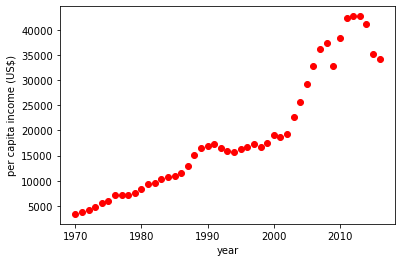

In [8]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(X, y, color = 'red', marker = 'o')
plt.show()

In [9]:
lr = LinearRegression()
lr.fit(X, y)

print("slope =",lr.coef_[0][0])
print("intercept = ",lr.intercept_[0])

LinearRegression()

slope = 828.4650752227104
intercept =  -1632210.7578554575


In [10]:

income_2020 = lr.predict([[2020]])
income_2020[0][0]

41288.69409441762

### Example 3 - Multiple Variables

https://www.skillbasics.com/courses/machine-learning-for-beginners/lecture/35

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [12]:
df = pd.read_csv("../data/homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [13]:
import math
df.bedrooms.median()
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4.0

4

In [14]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df 

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [15]:
lr = LinearRegression()
lr.fit(df[['area', 'bedrooms', 'age']], df['price'])

LinearRegression()

In [16]:
lr.coef_
lr.intercept_

array([  112.06244194, 23388.88007794, -3231.71790863])

221323.00186540408

In [17]:
lr.predict([[3000, 3, 40]])

array([498408.25158031])

#### Exercise

In [27]:
from word2number import w2n

In [28]:
df = pd.read_csv('../data/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [29]:
df.experience.fillna('zero', inplace = True)
df.experience = df.experience.apply(w2n.word_to_num)
df 

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [35]:
import math
mean_score = math.floor(df[['test_score(out of 10)']].mean())
df['test_score(out of 10)'] =df['test_score(out of 10)'].fillna(mean_score)
df 

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [37]:
lr = LinearRegression()
lr.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df[['salary($)']])

LinearRegression()

In [38]:
lr.predict([[2,9,6]])

array([[53713.86677124]])

In [39]:
lr.predict([[12,10,10]])

array([[93747.79628651]])